# Exploratory Data Analysis

Unique values in sentiment_category: ['neutral' 'negative' 'positive']


/tmp/ipykernel_241/3134731911.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment_category"], palette="coolwarm", order=["Negative", "Neutral", "Positive"])


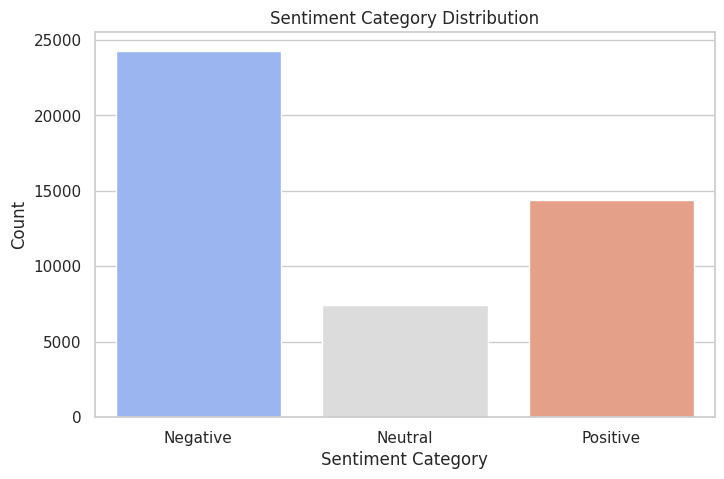

In [6]:
# 1. Sentiment Category Distribution

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "feature_engineered_data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Check if sentiment_category exists
if "sentiment_category" in df.columns:
    print("Unique values in sentiment_category:", df["sentiment_category"].unique())
else:
    print("Column 'sentiment_category' not found in dataset.")
    df["sentiment_category"] = "Unknown"  # Create a placeholder if missing

# Fix potential formatting issues (strip spaces, standardize case)
df["sentiment_category"] = df["sentiment_category"].astype(str).str.strip().str.capitalize()

# Check if there's actual data to plot
if df["sentiment_category"].nunique() > 0:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df["sentiment_category"], palette="coolwarm", order=["Negative", "Neutral", "Positive"])
    plt.title("Sentiment Category Distribution")
    plt.xlabel("Sentiment Category")
    plt.ylabel("Count")
    plt.show()
else:
    print("Skipping plot - No valid sentiment data available.")

This bar chart shows the distribution of sentiment categories in the dataset.

Negative sentiment is the most common, with over 25,000 instances.
Positive sentiment appears less frequently, around 15,000 instances.
Neutral sentiment is the least frequent, with fewer than 10,000 instances.
This suggests that the dataset contains more negative statements compared to neutral and positive ones.

Summary Statistics for Sentiment Score:
 count    46147.000000
mean        -0.190958
std          0.637535
min         -0.999700
25%         -0.836000
50%         -0.211400
75%          0.359700
max          0.998600
Name: sentiment_score, dtype: float64


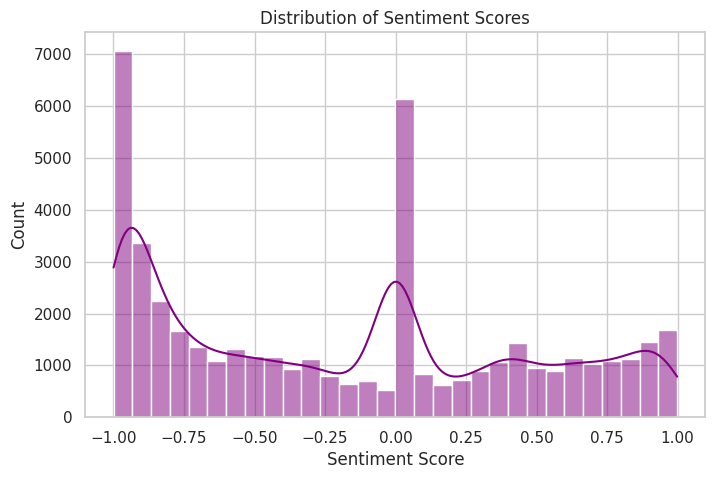

In [7]:
# 2. Sentiment Score Distribution

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "feature_engineered_data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Check if sentiment_score exists
if "sentiment_score" in df.columns:
    print("Summary Statistics for Sentiment Score:\n", df["sentiment_score"].describe())
    
    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(df["sentiment_score"], bins=30, kde=True, color="purple")
    plt.title("Distribution of Sentiment Scores")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Count")
    plt.show()
else:
    print("Skipping plot - Column 'sentiment_score' not found in dataset.")

This histogram shows the distribution of sentiment scores in the dataset.

Most sentiment scores are negative, with a mean of -0.19.
There are two major peaks: one at -1.0 (strongly negative) and another around 0 (neutral).
Positive sentiment scores are less frequent, but still present across the range.
The wide spread suggests a mix of emotions, with some highly positive and highly negative statements.
This confirms that negative sentiment dominates the dataset, aligning with the sentiment category distribution.

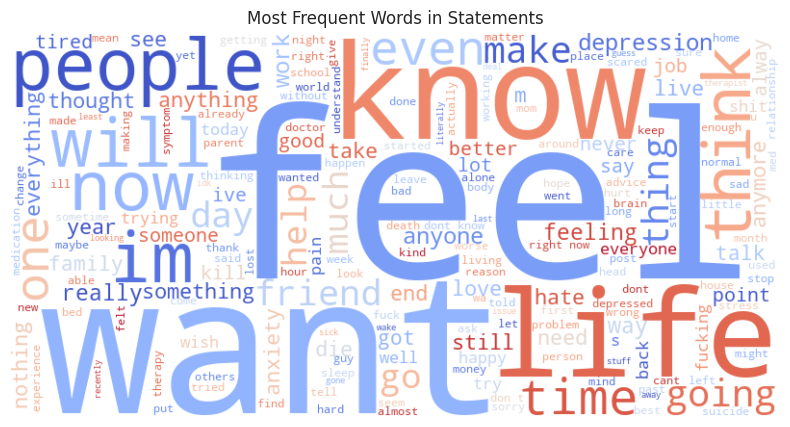

In [8]:
# 3. Word Cloud for Most Frequent Words in Statements

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
file_path = "feature_engineered_data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Check if 'statement' column exists
if "statement" in df.columns:
    # Join all text from the 'statement' column
    text_data = " ".join(df["statement"].dropna())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.title("Most Frequent Words in Statements")
    plt.show()
else:
    print("Skipping Word Cloud - Column 'statement' not found in dataset.")

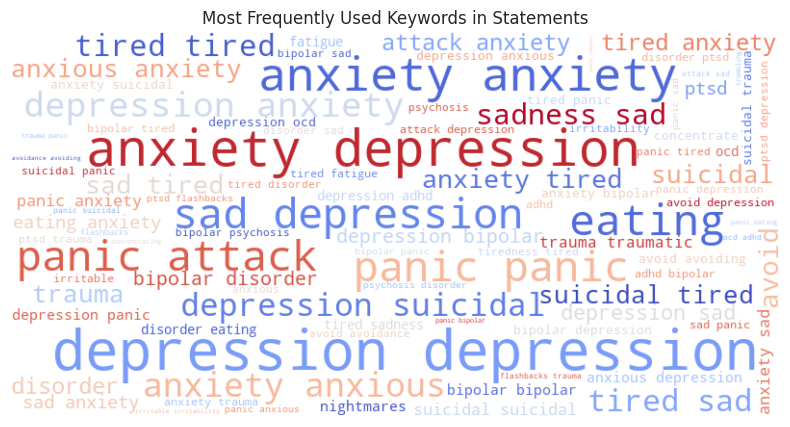

In [9]:
# 4. Word Cloud for Most Used Keywords (based on Keyword Feature)

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
file_path = "feature_engineered_data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Check if 'keywords_found' column exists
if "keywords_found" in df.columns and not df["keywords_found"].isnull().all():
    # Join all text from the 'keywords_found' column
    keyword_text = " ".join(df["keywords_found"].dropna())

    # Generate the word cloud
    keyword_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(keyword_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(keyword_wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.title("Most Frequently Used Keywords in Statements")
    plt.show()
else:
    print("Skipping Word Cloud - Column 'keywords_found' not found or is empty.")

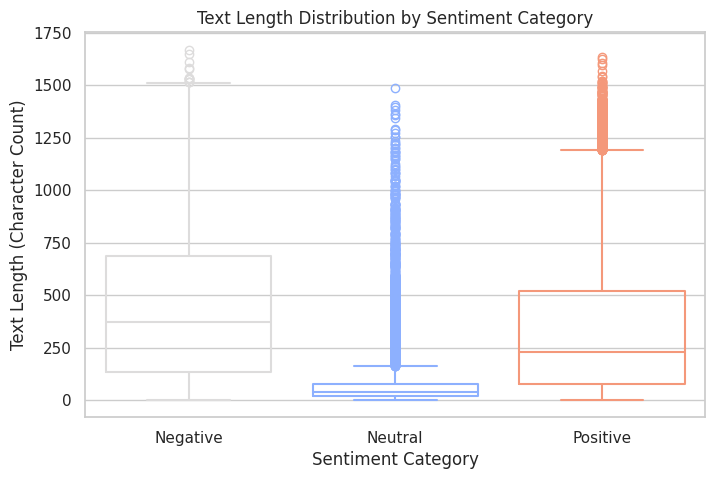

In [13]:
# 5. Box Plot of Text Length by Sentiment Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "feature_engineered_data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Ensure 'text_length' and 'sentiment_category' exist and clean up category labels
if "text_length" in df.columns and "sentiment_category" in df.columns:
    df["sentiment_category"] = df["sentiment_category"].astype(str).str.strip().str.capitalize()

    plt.figure(figsize=(8, 5))

    # Fix: Explicitly set `hue` and disable legend to avoid errors
    sns.boxplot(x="sentiment_category", y="text_length", data=df, hue="sentiment_category", palette="coolwarm", legend=False, fill=False, order=["Negative", "Neutral", "Positive"])

    plt.title("Text Length Distribution by Sentiment Category")
    plt.xlabel("Sentiment Category")
    plt.ylabel("Text Length (Character Count)")
    plt.show()
else:
    print("Skipping Box Plot - Required columns not found in dataset.")


This box plot visualizes the distribution of text length (character count) across sentiment categories.

Negative statements tend to be longer, with a wider range of text lengths.
Neutral statements are the shortest on average, but show many outliers with very long texts.
Positive statements have a moderate text length, with a slightly wider spread than neutral.
Outliers (dots above the boxes) suggest that some statements are significantly longer than the typical range.
This suggests that people expressing strong emotions (negative or positive) tend to write longer statements, while neutral statements are generally shorter.

/tmp/ipykernel_241/2208303474.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="sentiment_category", y="word_count", data=df, palette="coolwarm", order=["Negative", "Neutral", "Positive"])


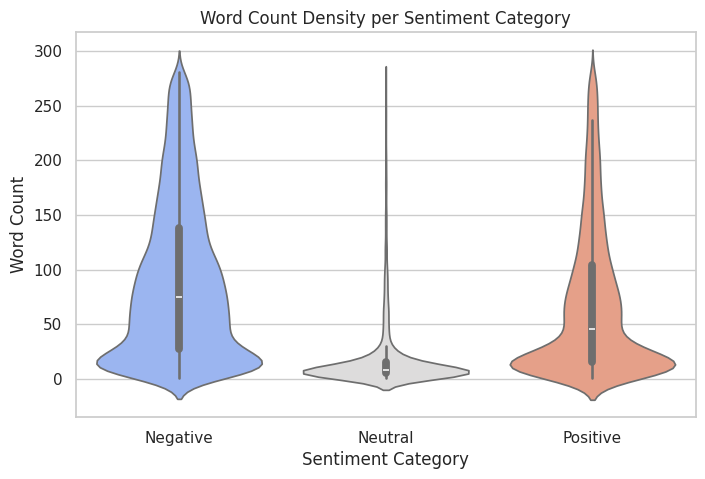

In [14]:
# 6. Violin Plot for Word Count by Sentiment Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "feature_engineered_data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Ensure 'word_count' and 'sentiment_category' columns exist
if "word_count" in df.columns and "sentiment_category" in df.columns:
    df["sentiment_category"] = df["sentiment_category"].astype(str).str.strip().str.capitalize()

    plt.figure(figsize=(8, 5))

    # Creating the violin plot
    sns.violinplot(x="sentiment_category", y="word_count", data=df, palette="coolwarm", order=["Negative", "Neutral", "Positive"])

    plt.title("Word Count Density per Sentiment Category")
    plt.xlabel("Sentiment Category")
    plt.ylabel("Word Count")
    plt.show()
else:
    print("Skipping Violin Plot - Required columns not found in dataset.")

This violin plot visualizes the distribution of word counts across sentiment categories.

Negative and Positive statements have a wider spread, meaning they contain both short and long responses.
Neutral statements are generally much shorter, with very few long responses.
The density is highest at lower word counts for all sentiment types, meaning most statements are relatively short.
Some extreme outliers (tall spikes) indicate that a few statements, especially in the neutral and positive categories, contain an unusually high number of words.
This suggests that strong emotions (negative or positive) lead to longer, more expressive statements, while neutral statements tend to be brief.

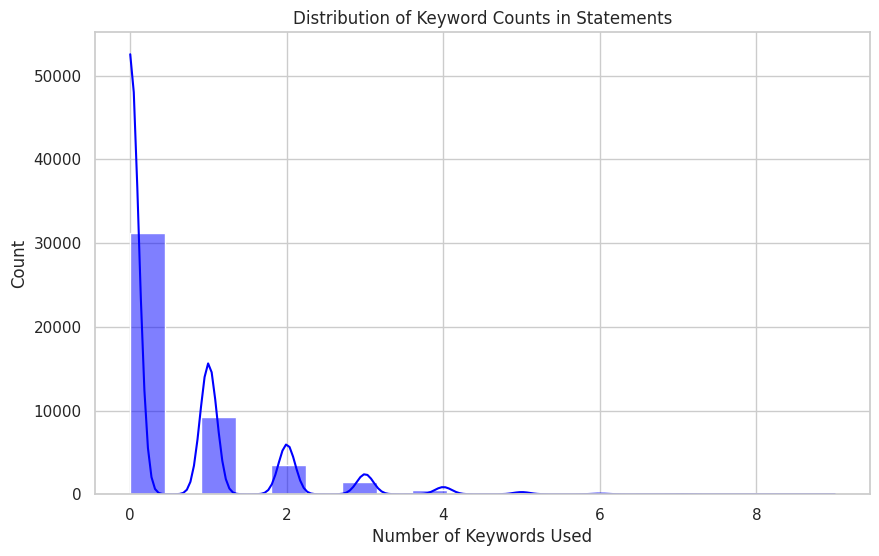

In [15]:
# 7. Distribution of Keyword Counts in Statement

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "feature_engineered_data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Ensure 'keyword_count' column exists
if "keyword_count" in df.columns:
    plt.figure(figsize=(10, 6))

    # Histogram with KDE
    sns.histplot(df["keyword_count"], bins=20, kde=True, color="blue")

    plt.title("Distribution of Keyword Counts in Statements")
    plt.xlabel("Number of Keywords Used")
    plt.ylabel("Count")
    plt.show()
else:
    print("Skipping Histogram - Column 'keyword_count' not found in dataset.")

This histogram with KDE plot shows the distribution of keyword counts in statements.

Most statements contain 0 or very few keywords, with a sharp peak at 0 keywords.
There are small secondary peaks at 1, 2, and 3 keywords, indicating some statements include a few mental health-related terms.
Very few statements contain 4 or more keywords, suggesting that detailed discussions about mental health are rare in this dataset.
The right-skewed distribution confirms that most text lacks explicit mental health-related words, but some do include them.
This suggests that many statements may express emotions indirectly, without using common mental health keywords.

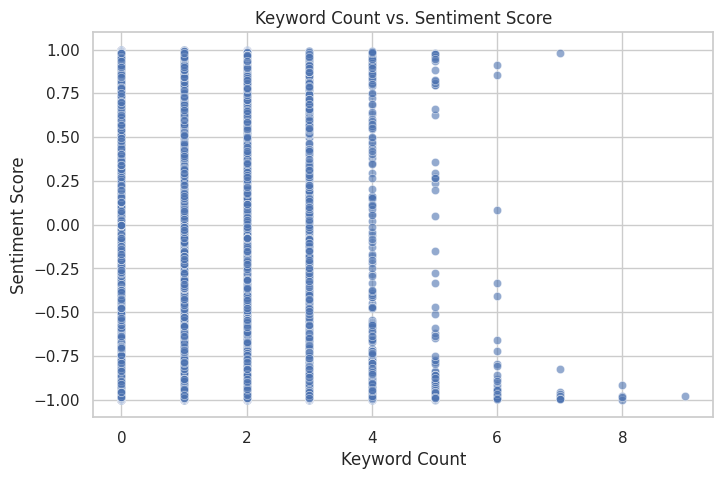

In [16]:
# 8. Relationship Between Keyword Count and Sentiment Score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "feature_engineered_data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Ensure 'keyword_count' and 'sentiment_score' columns exist
if "keyword_count" in df.columns and "sentiment_score" in df.columns:
    plt.figure(figsize=(8, 5))

    # Scatter plot of keyword count vs. sentiment score
    sns.scatterplot(x="keyword_count", y="sentiment_score", data=df, alpha=0.6)

    plt.title("Keyword Count vs. Sentiment Score")
    plt.xlabel("Keyword Count")
    plt.ylabel("Sentiment Score")
    plt.show()
else:
    print("Skipping Scatter Plot - Required columns not found in dataset.")

This scatter plot visualizes the relationship between keyword count and sentiment score.

Most data points are concentrated at 0 keywords, meaning many statements contain no mental health-related terms.
Sentiment scores appear evenly spread across different keyword counts, with both highly negative and highly positive scores present at all levels.
Statements with higher keyword counts (4+) tend to have extreme sentiment scores, suggesting that texts mentioning more mental health-related terms may express stronger emotions (either very positive or very negative).
There is no clear trend or correlation, meaning keyword count alone does not directly predict sentiment.
This suggests that mental health-related keywords do not strongly determine sentiment score, and other contextual factors may be at play.

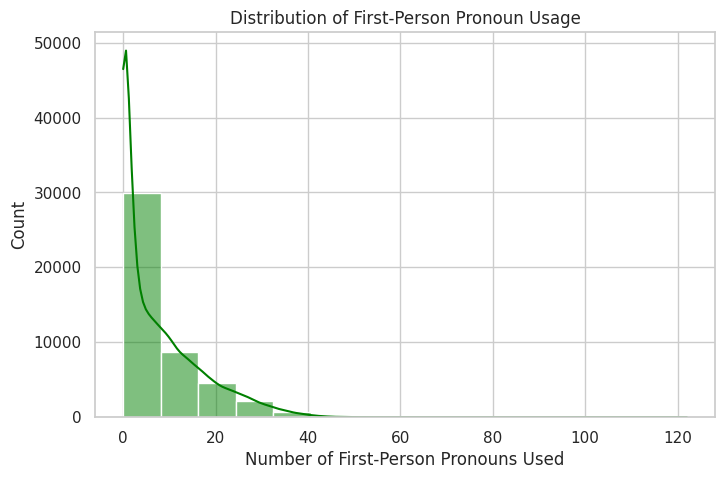

In [17]:
# 9. Distribution of First-Person Pronoun Usage

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "feature_engineered_data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Ensure 'first_person_pronoun_count' column exists
if "first_person_pronoun_count" in df.columns:
    plt.figure(figsize=(8, 5))

    # Histogram with KDE
    sns.histplot(df["first_person_pronoun_count"], bins=15, kde=True, color="green")

    plt.title("Distribution of First-Person Pronoun Usage")
    plt.xlabel("Number of First-Person Pronouns Used")
    plt.ylabel("Count")
    plt.show()
else:
    print("Skipping Histogram - Column 'first_person_pronoun_count' not found in dataset.")

This histogram with KDE plot shows the distribution of first-person pronoun usage in statements.

Most statements contain very few first-person pronouns, with a sharp peak at 0–5 pronouns.
The distribution is right-skewed, meaning fewer statements use a high number of first-person pronouns.
A small number of statements contain 20+ pronouns, suggesting long, self-focused narratives.
The decline in frequency as pronoun count increases indicates that self-referential language is not overly dominant in the dataset.
This suggests that most statements are not heavily self-focused, but a subset of responses may contain more personal reflections.

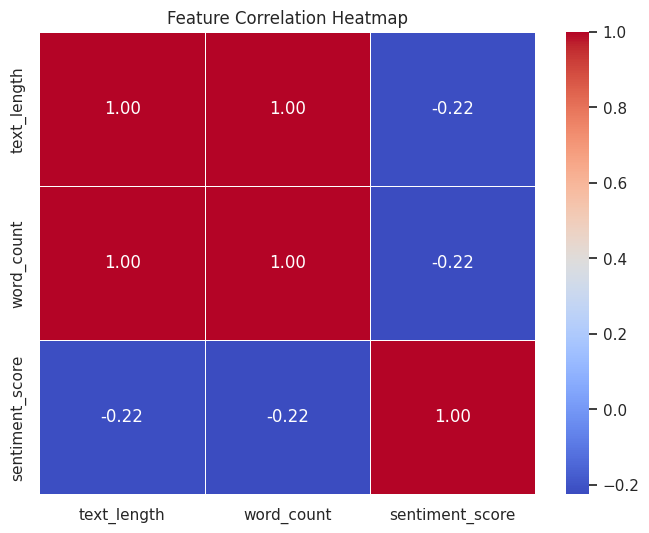

In [21]:
# 10. Correlation Heatmap for Feature Relationships

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "feature_engineered_data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Ensure numerical columns exist
if {"text_length", "word_count", "sentiment_score"}.issubset(df.columns):
    # Compute correlation matrix
    correlation_matrix = df[['text_length', 'word_count', 'sentiment_score']].corr()

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("Skipping Heatmap - Required numerical columns not found in dataset.")

This correlation heatmap shows the relationships between text length, word count, and sentiment score.

Text length and word count are perfectly correlated (1.00), meaning that longer texts naturally have more words.
Sentiment score has a weak negative correlation (~-0.22) with both text length and word count, suggesting that longer statements tend to have slightly more negative sentiment.
The weak correlation indicates that sentiment score is not strongly dependent on text length or word count, meaning other factors influence sentiment more than the size of the text.
This suggests that longer statements may be slightly more negative, but sentiment is likely influenced by the actual words used rather than length alone.